In [118]:
import numpy as np
from numpy.linalg import matrix_rank
from numpy import linalg
import sklearn.datasets
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
M = np.matrix([[1, 2, 3], [3, 4, 5], [5, 4, 3], [0, 2, 4], [1, 3, 5]])
M

matrix([[1, 2, 3],
        [3, 4, 5],
        [5, 4, 3],
        [0, 2, 4],
        [1, 3, 5]])

#### 1.1 What is the rank of M?

In [6]:
rank = np.linalg.matrix_rank(M)
rank

2

#### 1.2 Compute matrices M^TM and MM^T

In [7]:
mat_prod1 = np.dot(M.T, M)
mat_prod1

matrix([[36, 37, 38],
        [37, 49, 61],
        [38, 61, 84]])

In [8]:
mat_prod2 = np.dot(M, M.T)
mat_prod2

matrix([[14, 26, 22, 16, 22],
        [26, 50, 46, 28, 40],
        [22, 46, 50, 20, 32],
        [16, 28, 20, 20, 26],
        [22, 40, 32, 26, 35]])

#### 1.3 Find eigenvalues and eigenvectors of the matrices from the previous part

In [17]:
eigvals, eigvecs = linalg.eig(mat_prod1)
eigvals

array([153.56699646,  15.43300354,   0.        ])

In [18]:
eigvecs

matrix([[-0.40928285, -0.81597848,  0.40824829],
        [-0.56345932, -0.12588456, -0.81649658],
        [-0.7176358 ,  0.56420935,  0.40824829]])

In [19]:
eigvals2, eigvecs2 = linalg.eig(mat_prod2)
eigvals2


array([153.56699646,  -0.        ,  15.43300354,  -0.        ,
        -0.        ])

In [20]:
eigvecs2

matrix([[ 0.29769568,  0.94131607, -0.15906393, -0.57735012, -0.21094872],
        [ 0.57050856, -0.17481584,  0.0332003 , -0.22666834,  0.06716429],
        [ 0.52074297, -0.04034212,  0.73585663,  0.10591706, -0.13512315],
        [ 0.32257847, -0.18826321, -0.5103921 , -0.27280206, -0.68074095],
        [ 0.45898491, -0.21515796, -0.41425998,  0.72776982,  0.68507159]])

#### 1.4  Find the SVD of the matrix M based on your previous answers.

In [29]:
u, s, vh = np.linalg.svd(M)
u

matrix([[-0.29769568,  0.15906393,  0.82885904,  0.32312117,  0.30767084],
        [-0.57050856, -0.0332003 ,  0.22579433, -0.54857751, -0.56700737],
        [-0.52074297, -0.73585663, -0.23215374,  0.33116424,  0.15419683],
        [-0.32257847,  0.5103921 , -0.2979302 ,  0.61152014, -0.41560048],
        [-0.45898491,  0.41425998, -0.34547335, -0.33320985,  0.62236716]])

In [33]:
s

array([12.39221516,  3.92848616,  0.        ])

In [31]:
vh

matrix([[-0.40928285, -0.56345932, -0.7176358 ],
        [-0.81597848, -0.12588456,  0.56420935],
        [-0.40824829,  0.81649658, -0.40824829]])

### 2. Eigen Faces : 
In this exercise you will apply PCA to images of faces.  The Labeled Faces in the Wild (LFW) face recognition dataset contains face images of 5749 famous people collected over the internet. Each image is of size 62×47 pixels.  This dataset can be downloaded by calling the function sklearn.datasets.fetch_lfw_people().

#### 2.1 1.  Load the data and display a few faces to make sure you understand the data format.

In [24]:
data = fetch_lfw_people(min_faces_per_person=70)

In [25]:
print(f"Dataset dimensions are : {data.data.shape}")
print(f"Image dimensions are : {data.images.shape}")

Dataset dimensions are : (1288, 2914)
Image dimensions are : (1288, 62, 47)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

print(X_train.shape, X_test.shape)

(966, 2914) (322, 2914)


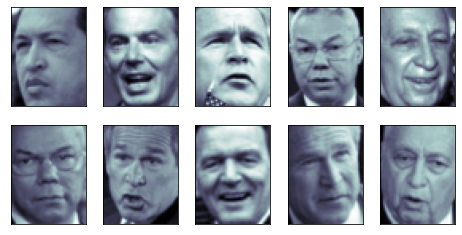

In [80]:
fig = plt.figure(figsize=(8, 4))

# plot few images
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.bone)
    

#### 2.2 Display the first 10 principal components of the data.  These should be vectors of length 62×47 = 2914, so you can reshape them and view them as face images just like the original data.  These types of images are often called ”eigenfaces”.

In [51]:
pca = PCA(n_components=150)
transformed_data = pca.fit(X_train)

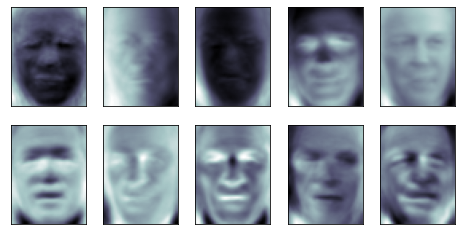

In [81]:
eigenfaces = pca.components_

fig = plt.figure(figsize=(8, 4))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(eigenfaces[i].reshape(data.images[0].shape), cmap=plt.cm.bone)

#### 2.3 Plot the cumulative variance explained by the principal components as a function of the number of components.

Text(0.5, 1.0, 'Variance Explained by the principal components')

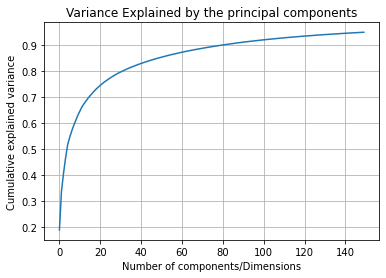

In [71]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Number of components/Dimensions')
plt.ylabel('Cumulative explained variance');
plt.grid()
plt.title("Variance Explained by the principal components")

#### 2.4 How many principal components are needed to retain 95% of the variance?

In [72]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

dimensions = np.argmax(cumsum >= .95)+1
dimensions

151

In [73]:
pca1 = PCA(n_components=0.95)
X_red = pca1.fit_transform(X_train)
X_red.shape

(966, 151)

We can see 151 principal components would be needed to retain 95% of the variance.

Note: I have loaded only a balanced sample of the whole dataset as it was huge and was taking a lot of time to train the models. 

#### 2.5 Choose  any  3  faces  and  reconstruct  them  using  the  first k principal  components,  fork= 5, 10, 50, 100

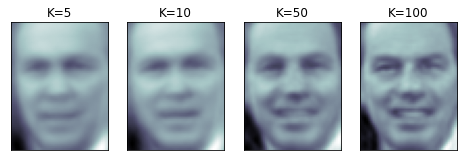

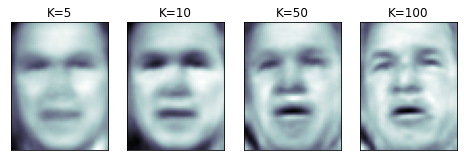

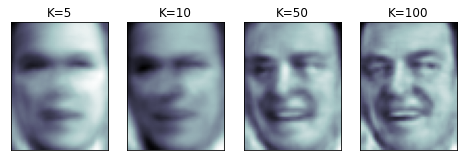

In [116]:
img_dict = {}
images = [20, 25, 30]
titles = []


for i in images:
    img_dict[i] = []
    for k in (5, 10, 50, 100):
        pca = PCA(n_components=k)
        X_reduced = pca.fit_transform(X_train)
        X_recovered = pca.inverse_transform(X_reduced) 
        img_dict[i].append(X_recovered[i])
        titles.append(k)
        
 
def plot_faces(img_dict):
    for imgs in img_dict:
        img_list = list(img_dict[imgs])
        fig = plt.figure(figsize=(8, 6))
        for i in range(4):
            ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
            ax.set_title("K={}".format(titles[i]))
            ax.imshow(img_list[i].reshape(62, 47), cmap=plt.cm.bone)


plot_faces(img_dict)


#### 2.6 Train a classifier on the images after reducing them to the number of dimensions youhave  found  in  part  4  (you  can  choose  any  classifier  to  your  liking).   How  does  the classification result compare to the classification on the original images?

#### Classification on Original Images:

In [119]:
# RandomForestClassifier
model_rf =  RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)


0.6739130434782609

#### Reducing the dimensions to 151 using PCA

In [120]:
pca = PCA(n_components=151)
X_reduced = pca.fit_transform(X_train)


#### Classification on reduced dimension images:

In [123]:
model_rf1 =  RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_rf1.fit(X_reduced, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [124]:
X_test_reduced = pca.fit_transform(X_test)

y_pred_rf1 = model_rf1.predict(X_test_reduced)

accuracy_score(y_test, y_pred_rf1)

0.38819875776397517

**Results:** We see that the accuracy of the reduced dataset ~38% which is quite less than the train dataset results of ~67% using Random Forest. 

### 3. t-SNE 
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result.  You can use a scatter plot using 10 different colors to represent each image’s target class.  Alternatively,you  can  replace  the  dots  in  the  scatter  plot  with  scaled-down  versions  of  the  digit images themselves.  If you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance.  You should get a nice visualization with well-separated clusters of digits.The MNIST dataset can be downloaded using the following code:X, y = sklearn.datasets.fetch_openml(’mnist_784’, return_X_y=True)

In [3]:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

In [6]:
X.shape

(70000, 784)

It's taking a lot of time to reduce the dimension of the complete dataset. So, doing it for a randomly selected sample of the dataset.

In [9]:
np.random.seed(42)

n = 10000
loc = np.random.permutation(X.shape[0])[:n]

X = X[loc]
y = y[loc]

In [10]:
X.shape

(10000, 784)

#### 1. Reduce the dataset to 2 dimensions

In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

#### 2. Plotting to represent each image's target class

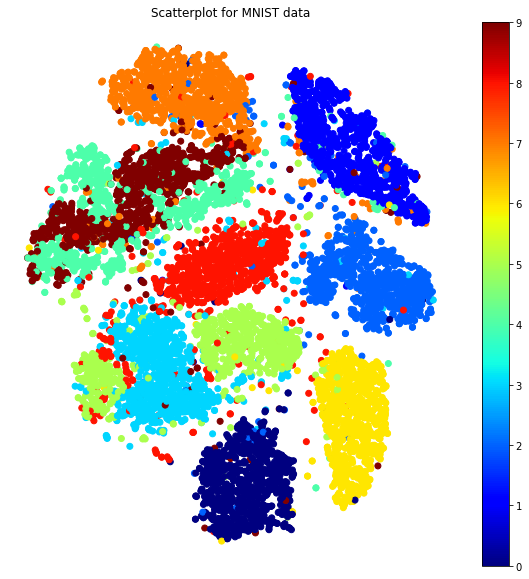

In [38]:
plt.figure(figsize=(10,10))

y =  y.astype(np.uint8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.title("Scatterplot for MNIST data")
plt.show()
